In [4]:
%pip install --user trulens-eval -q 
%conda install -c conda-forge ipywidgets

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0




In [5]:
%pip install pypdf -q
%pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [38]:
%pip install llama-index -q
%pip install sentence-transformers -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\Program_Installation\\anaconda\\envs\\env-llm\\Lib\\site-packages\\~orch\\lib\\asmjit.dll'
Consider using the `--user` option or check the permissions.



In [7]:
import utils

import os
import openai

In [8]:
from llama_index import SimpleDirectoryReader

documents = SimpleDirectoryReader(
    input_files = ["./data/eBook-How-to-Build-a-Career-in-AI_2.pdf"]
).load_data()

In [9]:
print(type(documents), "\n")
print(len(documents), "\n")

<class 'list'> 

41 



In [10]:
print(type(documents[1]), "\n")
print(documents[1])

<class 'llama_index.schema.Document'> 

Doc ID: 746e68a5-f340-48eb-9f8c-545182d17b21
Text: PAGE 2"AI is the new  electricity. It will  transform and
improve  all areas of human life." Andrew Ng


## Building a basic RAG pipeline

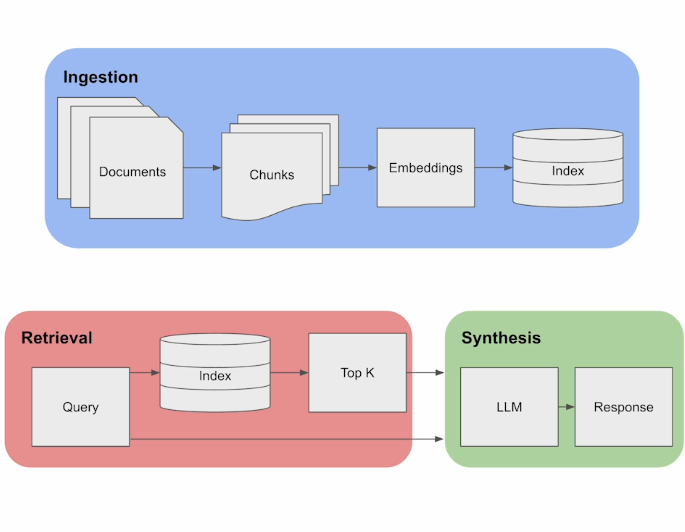

In [11]:
openai.api_key = utils.get_openai_api_key()

In [12]:
for doc in documents[:3]:
    print(doc.text)

PAGE 1Founder, DeepLearning.AICollected Insights
from Andrew Ng
How to 
Build
Your
Career
in AIA Simple Guide

PAGE 2"AI is the new 
electricity. It will 
transform and improve 
all areas of human life."
Andrew Ng
PAGE 3Table of 
ContentsIntroduction: Coding AI is the New Literacy.
Chapter 1: Three Steps to Career Growth.
Chapter 2: Learning Technical Skills for a 
Promising AI Career.
Chapter 3: Should You Learn Math to Get a Job 
in AI?
Chapter 4: Scoping Successful AI Projects.
Chapter 5: Finding Projects that Complement 
Your Career Goals.
Chapter 6: Building a Portfolio of Projects that 
Shows Skill Progression.
Chapter 7: A Simple Framework for Starting Your AI 
Job Search.
Chapter 8: Using Informational Interviews to Find 
the Right Job.
Chapter 9: Finding the Right AI Job for You.
Chapter 10: Keys to Building a Career in AI.
Chapter 11: Overcoming Imposter Syndrome.
Final Thoughts: Make Every Day Count.LEARNING
PROJECTS
JOB


In [13]:
from llama_index import Document

document = Document(text = "\n\n".join([doc.text for doc in documents]))

In [14]:
document

Document(id_='92ba6b78-a34c-4416-95d0-acab2b6dd61e', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, hash='fdc7ce9a017ce62d4e0b30cc419051a9bb56618a8569f51a2b64f8535fe6244e', text='PAGE 1Founder, DeepLearning.AICollected Insights\nfrom Andrew Ng\nHow to \nBuild\nYour\nCareer\nin AIA Simple Guide\n\n\nPAGE 2"AI is the new \nelectricity. It will \ntransform and improve \nall areas of human life."\nAndrew Ng\n\nPAGE 3Table of \nContentsIntroduction: Coding AI is the New Literacy.\nChapter 1: Three Steps to Career Growth.\nChapter 2: Learning Technical Skills for a \nPromising AI Career.\nChapter 3: Should You Learn Math to Get a Job \nin AI?\nChapter 4: Scoping Successful AI Projects.\nChapter 5: Finding Projects that Complement \nYour Career Goals.\nChapter 6: Building a Portfolio of Projects that \nShows Skill Progression.\nChapter 7: A Simple Framework for Starting Your AI \nJob Search.\nChapter 8: Using Informational Interv

In [15]:
from llama_index import VectorStoreIndex
from llama_index import ServiceContext
from llama_index.llms import OpenAI

llm = OpenAI(model = "gpt-3.5-turbo", temperature = 0.1)

service_context = ServiceContext.from_defaults(
    llm = llm, embed_model = "local:BAAI/bge-small-en-v1.5"
)

In [16]:
index = VectorStoreIndex.from_documents([document],
                                        service_context = service_context)

In [17]:
query_engine = index.as_query_engine()

In [18]:
response = query_engine.query(
    "Could you please explain step by step how to build your experience?"
)
print(response)

To build your experience, you can follow these steps:

1. Learn foundational skills: Start by learning the foundational technical skills required for your chosen field. This may include understanding models such as linear regression, logistic regression, neural networks, decision trees, clustering, and anomaly detection. It's also important to grasp core concepts like bias/variance, cost functions, regularization, optimization algorithms, and error analysis.

2. Work on projects: Once you have gained foundational technical skills, start working on projects. This will help you deepen your skills, build a portfolio, and create impact. Collaborate with stakeholders who may not have expertise in your field, as this will provide valuable experience in working with diverse teams.

3. Find a job: While searching for a job, keep in mind that the AI field is still evolving, and companies may have varying opinions on the required skills and job roles. Educate potential employers about your work 

In [19]:
response = query_engine.query(
    "Could you please guide me on job search in AI?"
)
print(response)

To navigate the job search in AI, it is important to follow a structured approach. Here is a simple framework to guide you:

1. Learning Foundational Skills: Start by acquiring foundational technical skills in AI, such as understanding machine learning models, deep learning concepts, and software development. This will provide a strong base for your AI career.

2. Working on Projects: Once you have gained foundational skills, focus on working on meaningful projects. This will help deepen your skills, build a portfolio, and create impact. Collaborate with stakeholders who may not have expertise in AI, as this will enhance your ability to communicate and work effectively in a team.

3. Finding a Job: When searching for an AI job, keep in mind that the field is still evolving. Stay up-to-date with changing technology and be prepared to educate potential employers about your work. Build a supportive community of friends and allies who can provide guidance and support throughout your job se

## Evaluation setup using TruLens

In [20]:
eval_questions = []
with open('./data/eval_questions.txt', 'r') as file:
    for line in file:
        # Remove newline character and convert to integer
        item = line.strip()
        print(item)
        eval_questions.append(item)

What are the keys to building a career in AI?
How can teamwork contribute to success in AI?
What is the importance of networking in AI?
What are some good habits to develop for a successful career?
How can altruism be beneficial in building a career?
What is imposter syndrome and how does it relate to AI?
Who are some accomplished individuals who have experienced imposter syndrome?
What is the first step to becoming good at AI?
What are some common challenges in AI?
Is it normal to find parts of AI challenging?


In [21]:
# You can add more questions if required
new_question = "What is the right AI job for me?"
eval_questions.append(new_question)

In [22]:
print(eval_questions)

['What are the keys to building a career in AI?', 'How can teamwork contribute to success in AI?', 'What is the importance of networking in AI?', 'What are some good habits to develop for a successful career?', 'How can altruism be beneficial in building a career?', 'What is imposter syndrome and how does it relate to AI?', 'Who are some accomplished individuals who have experienced imposter syndrome?', 'What is the first step to becoming good at AI?', 'What are some common challenges in AI?', 'Is it normal to find parts of AI challenging?', 'What is the right AI job for me?']


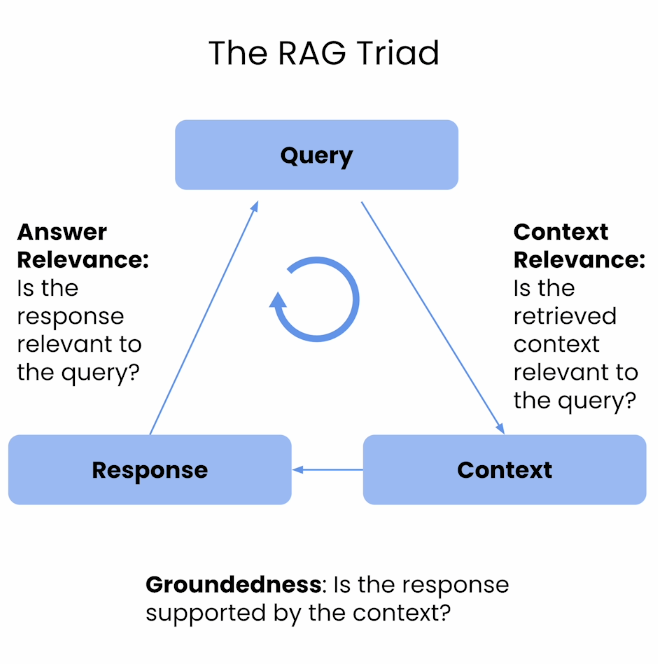

In [23]:
from trulens_eval import Tru

tru = Tru()
tru.reset_database()

In [24]:
from utils import get_prebuilt_trulens_recorder

tru_recorder = get_prebuilt_trulens_recorder(query_engine,
                                            app_id = "Direct Query Engine")

In [25]:
# record the responses in trulens
with tru_recorder as recording:
    for question in eval_questions:
        response = query_engine.query(question)

In [26]:
records, feedback = tru.get_records_and_feedback(app_ids=[])

In [27]:
records.head()

,app_id,app_json,type,record_id,input,output,tags,record_json,cost_json,perf_json,ts,Answer Relevance,Context Relevance,Groundedness,Answer Relevance_calls,Context Relevance_calls,Groundedness_calls,latency,total_tokens,total_cost
0,Direct Query Engine,"{""app_id"": ""Direct Query Engine"", ""tags"": ""-"",...",RetrieverQueryEngine(llama_index.query_engine....,record_hash_a3b4e9f2d158649bbb9ec759fad37705,"""What are the keys to building a career in AI?""","""The keys to building a career in AI are learn...",-,"{""record_id"": ""record_hash_a3b4e9f2d158649bbb9...","{""n_requests"": 1, ""n_successful_requests"": 1, ...","{""start_time"": ""2023-11-30T22:21:35.057208"", ""...",2023-11-30T22:21:39.083840,1.0,0.95,1.00,[{'args': {'prompt': 'What are the keys to bui...,[{'args': {'prompt': 'What are the keys to bui...,"[{'args': {'source': 'PAGE 1Founder, DeepLearn...",4,2250,0.003491
1,Direct Query Engine,"{""app_id"": ""Direct Query Engine"", ""tags"": ""-"",...",RetrieverQueryEngine(llama_index.query_engine....,record_hash_0fc58082803b0876c07919041259fbfa,"""How can teamwork contribute to success in AI?""","""Collaborating and working in teams is crucial...",-,"{""record_id"": ""record_hash_0fc58082803b0876c07...","{""n_requests"": 1, ""n_successful_requests"": 1, ...","{""start_time"": ""2023-11-30T22:21:39.555518"", ""...",2023-11-30T22:21:41.895349,1.0,0.00,1.00,[{'args': {'prompt': 'How can teamwork contrib...,[{'args': {'prompt': 'How can teamwork contrib...,[{'args': {'source': 'Hopefully the previous c...,2,1724,0.002635
2,Direct Query Engine,"{""app_id"": ""Direct Query Engine"", ""tags"": ""-"",...",RetrieverQueryEngine(llama_index.query_engine....,record_hash_ef5922728a4ebae306955a7c38c6b6fd,"""What is the importance of networking in AI?""","""Networking is important in AI because it allo...",-,"{""record_id"": ""record_hash_ef5922728a4ebae3069...","{""n_requests"": 1, ""n_successful_requests"": 1, ...","{""start_time"": ""2023-11-30T22:21:42.369149"", ""...",2023-11-30T22:21:44.529972,1.0,0.00,0.25,[{'args': {'prompt': 'What is the importance o...,[{'args': {'prompt': 'What is the importance o...,[{'args': {'source': 'Hopefully the previous c...,2,1706,0.002599
3,Direct Query Engine,"{""app_id"": ""Direct Query Engine"", ""tags"": ""-"",...",RetrieverQueryEngine(llama_index.query_engine....,record_hash_c95dbd98e6c00a7c5430bfc11b5b1faf,"""What are some good habits to develop for a su...","""Developing good habits is crucial for a succe...",-,"{""record_id"": ""record_hash_c95dbd98e6c00a7c543...","{""n_requests"": 1, ""n_successful_requests"": 1, ...","{""start_time"": ""2023-11-30T22:21:45.011480"", ""...",2023-11-30T22:21:47.175568,1.0,0.60,0.75,[{'args': {'prompt': 'What are some good habit...,[{'args': {'prompt': 'What are some good habit...,[{'args': {'source': 'Hopefully the previous c...,2,1676,0.002554
4,Direct Query Engine,"{""app_id"": ""Direct Query Engine"", ""tags"": ""-"",...",RetrieverQueryEngine(llama_index.query_engine....,record_hash_d78e774afac08e4d47e3fc53921bed3b,"""How can altruism be beneficial in building a ...","""Altruism can be beneficial in building a care...",-,"{""record_id"": ""record_hash_d78e774afac08e4d47e...","{""n_requests"": 1, ""n_successful_requests"": 1, ...","{""start_time"": ""2023-11-30T22:21:47.685129"", ""...",2023-11-30T22:21:49.854289,1.0,0.00,0.50,[{'args': {'prompt': 'How can altruism be bene...,[{'args': {'prompt': 'How can altruism be bene...,[{'args': {'source': 'Hopefully the previous c...,2,1668,0.002539


In [ ]:
tru.run_dashboard()

In [ ]:
# %pip install streamlit -q

## Advanced RAG pipeline

#### 1. Sentence Window retrieval

In [35]:
from llama_index.llms import OpenAI

llm = OpenAI(model = "gpt-3.5-turbo", temperature = 0.1)

In [36]:
from utils import build_sentence_window_index

sentence_index = build_sentence_window_index(
    document,
    llm,
    embed_model = "local:BAAI/bge-small-en-v1.5",
    save_dir = "sentence_index"
)

In [40]:
from utils import get_sentence_window_query_engine

sentence_window_engine = get_sentence_window_query_engine(sentence_index)

config.json:   0%|          | 0.00/799 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/279 [00:00<?, ?B/s]

In [41]:
window_response = sentence_window_engine.query(
    "how do I get started on applying new data scinece job?"
)
print(window_response)

To get started on applying for a new data science job, it is recommended to take an incremental approach. Begin by identifying potential roles that align with your interests and conduct informational interviews with professionals in those roles. These interviews will provide valuable insights into the job and industry, helping you determine if you need to acquire additional skills or knowledge before applying. Create a plan of action for each scenario and start executing actions that seem reasonable. Periodically review and adjust your plans as you gain more clarity about the future. By following this approach, you can take proactive steps towards finding the right data science job.


In [42]:
# tru.reset_database()

tru_recorder_sentence_window = get_prebuilt_trulens_recorder(
    sentence_window_engine,
    app_id = "Sentence Window Query Engine"
)

In [43]:
for question in eval_questions:
    with tru_recorder_sentence_window as recording:
        response = sentence_window_engine.query(question)
        print(question)
        print(response)

What are the keys to building a career in AI?
The keys to building a career in AI are learning foundational technical skills, working on projects, and finding a job, all of which is supported by being part of a community.
How can teamwork contribute to success in AI?
Teamwork can contribute to success in AI by allowing individuals to leverage the expertise and insights of their colleagues. When working on larger AI projects that require collaboration, the ability to lead and work effectively as a team becomes crucial. By working together, team members can share their deep technical insights, make informed decisions about technical architecture or data collection, and ultimately improve the project. Additionally, being surrounded by colleagues who are dedicated, hardworking, and continuously learning can inspire individuals to do the same, leading to greater success in AI endeavors.
What is the importance of networking in AI?
Networking is important in AI because it allows individuals t

In [44]:
tru.get_leaderboard(app_ids=[])

,Answer Relevance,Groundedness,Context Relevance,latency,total_cost
app_id,,,,,
Sentence Window Query Engine,0.981818,0.795455,0.227273,3.090909,0.000846


In [ ]:
tru.run_dashboard()

#### 2. Auto-merging retrieval

In [46]:
from utils import build_automerging_index

automerging_index = build_automerging_index(
    documents,
    llm,
    embed_model = "local:BAAI/bge-small-en-v1.5",
    save_dir = "merging_index"
)

In [47]:
from utils import get_automerging_query_engine

automerging_query_engine = get_automerging_query_engine(
    automerging_index,
)

In [48]:
auto_merging_response = automerging_query_engine.query(
        "How do I build a portfolio of AI projects?"
)

print(auto_merging_response)

> Merging 1 nodes into parent node.
> Parent node id: 843298e4-7cc7-4bc4-9428-e48eeda768fa.
> Parent node text: PAGE 21Building a Portfolio of 
Projects that Shows 
Skill Progression CHAPTER 6
PROJECTS

> Merging 1 nodes into parent node.
> Parent node id: 5a53536e-ef09-4854-b481-9cfeb899a147.
> Parent node text: PAGE 21Building a Portfolio of 
Projects that Shows 
Skill Progression CHAPTER 6
PROJECTS

To build a portfolio of AI projects, it is important to start with simple undertakings and gradually progress to more complex ones. This progression will demonstrate your growth and development over time. Additionally, effective communication is crucial in order to explain your thinking and showcase the value of your work. This will help others see the potential in your projects and trust you with resources for larger endeavors.


In [49]:
tru.reset_database()

tru_recorder_automerging = get_prebuilt_trulens_recorder(automerging_query_engine,
                                                        app_id="Automerging Query Engine")

In [50]:
for question in eval_questions:
    with tru_recorder_automerging as recording:
        response = automerging_query_engine.query(question)
        print(question)
        print(response)

A new object of type <class 'llama_index.query_engine.retriever_query_engine.RetrieverQueryEngine'> at 0x1ff40e251d0 is calling an instrumented method <function BaseQueryEngine.query at 0x000001FF117191C0>. The path of this call may be incorrect.
Guessing path of new object is app based on other object (0x1ff43563490) using this function.
A new object of type <class 'llama_index.query_engine.retriever_query_engine.RetrieverQueryEngine'> at 0x1ff40e251d0 is calling an instrumented method <function RetrieverQueryEngine.retrieve at 0x000001FF1B126660>. The path of this call may be incorrect.
Guessing path of new object is app based on other object (0x1ff43563490) using this function.
A new object of type <class 'llama_index.retrievers.auto_merging_retriever.AutoMergingRetriever'> at 0x1ff428c99d0 is calling an instrumented method <function BaseRetriever.retrieve at 0x000001FF11718040>. The path of this call may be incorrect.
Guessing path of new object is app.retriever based on other obje

> Merging 2 nodes into parent node.
> Parent node id: 6eeb0d22-a48e-472d-9004-87886ffaa961.
> Parent node text: PAGE 3Table of 
ContentsIntroduction: Coding AI is the New Literacy.
Chapter 1: Three Steps to Ca...

> Merging 1 nodes into parent node.
> Parent node id: deb92f86-1822-4087-b40d-f34cce9caeba.
> Parent node text: PAGE 3Table of 
ContentsIntroduction: Coding AI is the New Literacy.
Chapter 1: Three Steps to Ca...



A new object of type <class 'llama_index.response_synthesizers.compact_and_refine.CompactAndRefine'> at 0x1ff40e24790 is calling an instrumented method <function CompactAndRefine.get_response at 0x000001FF118A23E0>. The path of this call may be incorrect.
Guessing path of new object is app._response_synthesizer based on other object (0x1ff43563410) using this function.
A new object of type <class 'llama_index.response_synthesizers.compact_and_refine.CompactAndRefine'> at 0x1ff40e24790 is calling an instrumented method <function Refine.get_response at 0x000001FF12E03BA0>. The path of this call may be incorrect.
Guessing path of new object is app._response_synthesizer based on other object (0x1ff43563410) using this function.
A new object of type <class 'llama_index.llm_predictor.base.LLMPredictor'> at 0x1ff408322d0 is calling an instrumented method <function LLMPredictor.predict at 0x000001FF0F6F22A0>. The path of this call may be incorrect.
Guessing path of new object is app._response_

What are the keys to building a career in AI?
The keys to building a career in AI include learning foundational technical skills, working on projects, finding a job, and being part of a community. Additionally, collaborating with others and being able to influence and be influenced by others is critical for success in AI.


A new object of type <class 'llama_index.query_engine.retriever_query_engine.RetrieverQueryEngine'> at 0x1ff40e251d0 is calling an instrumented method <function RetrieverQueryEngine.retrieve at 0x000001FF1B126660>. The path of this call may be incorrect.
Guessing path of new object is app based on other object (0x1ff43563490) using this function.
A new object of type <class 'llama_index.response_synthesizers.compact_and_refine.CompactAndRefine'> at 0x1ff40e24790 is calling an instrumented method <function Refine.get_response at 0x000001FF12E03BA0>. The path of this call may be incorrect.
Guessing path of new object is app._response_synthesizer based on other object (0x1ff43563410) using this function.


How can teamwork contribute to success in AI?
Teamwork can contribute to success in AI by allowing individuals to collaborate, influence, and be influenced by others. When working on larger AI projects that require teamwork, the ability to work effectively with others becomes crucial. By working in teams, individuals can leverage the diverse skills and perspectives of team members, leading to more innovative and comprehensive solutions. Additionally, teamwork enables individuals to divide tasks and responsibilities, increasing efficiency and productivity. Overall, the ability to collaborate and work effectively in teams is critical for success in AI projects.


A new object of type <class 'llama_index.query_engine.retriever_query_engine.RetrieverQueryEngine'> at 0x1ff40e251d0 is calling an instrumented method <function RetrieverQueryEngine.retrieve at 0x000001FF1B126660>. The path of this call may be incorrect.
Guessing path of new object is app based on other object (0x1ff43563490) using this function.


> Merging 3 nodes into parent node.
> Parent node id: a95cf373-80a6-4e76-8a6a-f5b7f61866a4.
> Parent node text: PAGE 35Keys to Building a Career in AI CHAPTER 10
The path to career success in AI is more comple...

> Merging 1 nodes into parent node.
> Parent node id: 4ec6cbd4-1924-4699-b716-f667d45c150c.
> Parent node text: PAGE 35Keys to Building a Career in AI CHAPTER 10
The path to career success in AI is more comple...



A new object of type <class 'llama_index.response_synthesizers.compact_and_refine.CompactAndRefine'> at 0x1ff40e24790 is calling an instrumented method <function Refine.get_response at 0x000001FF12E03BA0>. The path of this call may be incorrect.
Guessing path of new object is app._response_synthesizer based on other object (0x1ff43563410) using this function.


What is the importance of networking in AI?
Networking is important in AI because it helps in building a strong professional network and community. This network can provide help and advice when needed, and can also open up opportunities for career advancement. By connecting with others in the field, individuals can stay updated on industry trends, collaborate on projects, and gain valuable insights and knowledge. Building a network in AI can be particularly beneficial for future job searches, as it can make the process easier and provide access to potential opportunities.


A new object of type <class 'llama_index.query_engine.retriever_query_engine.RetrieverQueryEngine'> at 0x1ff40e251d0 is calling an instrumented method <function RetrieverQueryEngine.retrieve at 0x000001FF1B126660>. The path of this call may be incorrect.
Guessing path of new object is app based on other object (0x1ff43563490) using this function.


> Merging 2 nodes into parent node.
> Parent node id: a3999736-fad7-4496-b6fa-8a53aa4eb42d.
> Parent node text: PAGE 36Keys to Building a Career in AI CHAPTER 10
Of all the steps in building a career, this 
on...

> Merging 2 nodes into parent node.
> Parent node id: 73d7f483-cc5e-44e3-bbcd-541e81906e22.
> Parent node text: PAGE 11
The Best Way to Build 
a New Habit
One of my favorite books is BJ Fogg’s, Tiny Habits: Th...

> Merging 1 nodes into parent node.
> Parent node id: d4c615ab-de07-4216-9e5f-4e1455652c5c.
> Parent node text: PAGE 36Keys to Building a Career in AI CHAPTER 10
Of all the steps in building a career, this 
on...

> Merging 1 nodes into parent node.
> Parent node id: ebaf1537-6a1e-4169-9d5c-b80d654e424b.
> Parent node text: PAGE 11
The Best Way to Build 
a New Habit
One of my favorite books is BJ Fogg’s, Tiny Habits: Th...



A new object of type <class 'llama_index.response_synthesizers.compact_and_refine.CompactAndRefine'> at 0x1ff40e24790 is calling an instrumented method <function Refine.get_response at 0x000001FF12E03BA0>. The path of this call may be incorrect.
Guessing path of new object is app._response_synthesizer based on other object (0x1ff43563410) using this function.


What are some good habits to develop for a successful career?
Developing good habits in eating, exercise, sleep, personal relationships, work, learning, and self-care can help in building a successful career.


A new object of type <class 'llama_index.query_engine.retriever_query_engine.RetrieverQueryEngine'> at 0x1ff40e251d0 is calling an instrumented method <function RetrieverQueryEngine.retrieve at 0x000001FF1B126660>. The path of this call may be incorrect.
Guessing path of new object is app based on other object (0x1ff43563490) using this function.
A new object of type <class 'llama_index.response_synthesizers.compact_and_refine.CompactAndRefine'> at 0x1ff40e24790 is calling an instrumented method <function Refine.get_response at 0x000001FF12E03BA0>. The path of this call may be incorrect.
Guessing path of new object is app._response_synthesizer based on other object (0x1ff43563410) using this function.


How can altruism be beneficial in building a career?
Altruism can be beneficial in building a career by helping others during the journey. By aiming to lift others and providing support, individuals can achieve better outcomes for themselves. This act of helping others not only contributes to personal growth but also helps in building a strong network and fostering positive relationships within the professional community. Additionally, by paying it forward and assisting others who are coming up in their careers, individuals can create a positive reputation and gain the respect and gratitude of their peers.


A new object of type <class 'llama_index.query_engine.retriever_query_engine.RetrieverQueryEngine'> at 0x1ff40e251d0 is calling an instrumented method <function RetrieverQueryEngine.retrieve at 0x000001FF1B126660>. The path of this call may be incorrect.
Guessing path of new object is app based on other object (0x1ff43563490) using this function.


> Merging 5 nodes into parent node.
> Parent node id: bce9e8e7-5212-4a7e-a4ef-a4238772650b.
> Parent node text: PAGE 38Before we dive into the final chapter of this book, I’d like to address the serious matter...

> Merging 1 nodes into parent node.
> Parent node id: 4babe552-e8bb-481f-b93e-582bace81908.
> Parent node text: PAGE 37Overcoming Imposter 
SyndromeCHAPTER 11

> Merging 3 nodes into parent node.
> Parent node id: 9d94172b-616d-48df-83af-5a2d32b19f75.
> Parent node text: PAGE 39My three-year-old daughter (who can barely count to 12) regularly tries to teach things to...

> Merging 1 nodes into parent node.
> Parent node id: 3e7c0343-2096-48a1-9135-3c78aa95bf96.
> Parent node text: PAGE 38Before we dive into the final chapter of this book, I’d like to address the serious matter...

> Merging 1 nodes into parent node.
> Parent node id: bcc797e4-4e56-49fa-8e30-184327db17b5.
> Parent node text: PAGE 37Overcoming Imposter 
SyndromeCHAPTER 11

> Merging 1 nodes into parent node.
> 

A new object of type <class 'llama_index.response_synthesizers.compact_and_refine.CompactAndRefine'> at 0x1ff40e24790 is calling an instrumented method <function Refine.get_response at 0x000001FF12E03BA0>. The path of this call may be incorrect.
Guessing path of new object is app._response_synthesizer based on other object (0x1ff43563410) using this function.


What is imposter syndrome and how does it relate to AI?
Imposter syndrome is a psychological phenomenon where individuals doubt their accomplishments and have a persistent fear of being exposed as a fraud, despite evidence of their competence. In the context of AI, imposter syndrome can affect newcomers to the field who may question their abilities and feel like they don't belong in the AI community, regardless of their success. The passage emphasizes that imposter syndrome is not uncommon in the AI community, even among accomplished individuals, and encourages everyone who wants to join the AI community to be welcomed and supported.


A new object of type <class 'llama_index.query_engine.retriever_query_engine.RetrieverQueryEngine'> at 0x1ff40e251d0 is calling an instrumented method <function RetrieverQueryEngine.retrieve at 0x000001FF1B126660>. The path of this call may be incorrect.
Guessing path of new object is app based on other object (0x1ff43563490) using this function.


> Merging 1 nodes into parent node.
> Parent node id: 4babe552-e8bb-481f-b93e-582bace81908.
> Parent node text: PAGE 37Overcoming Imposter 
SyndromeCHAPTER 11

> Merging 3 nodes into parent node.
> Parent node id: 9d94172b-616d-48df-83af-5a2d32b19f75.
> Parent node text: PAGE 39My three-year-old daughter (who can barely count to 12) regularly tries to teach things to...

> Merging 1 nodes into parent node.
> Parent node id: bcc797e4-4e56-49fa-8e30-184327db17b5.
> Parent node text: PAGE 37Overcoming Imposter 
SyndromeCHAPTER 11

> Merging 1 nodes into parent node.
> Parent node id: 37b37b46-d9e9-4325-9eb0-8d78040f854a.
> Parent node text: PAGE 39My three-year-old daughter (who can barely count to 12) regularly tries to teach things to...



A new object of type <class 'llama_index.response_synthesizers.compact_and_refine.CompactAndRefine'> at 0x1ff40e24790 is calling an instrumented method <function Refine.get_response at 0x000001FF12E03BA0>. The path of this call may be incorrect.
Guessing path of new object is app._response_synthesizer based on other object (0x1ff43563410) using this function.


Who are some accomplished individuals who have experienced imposter syndrome?
Sheryl Sandberg, Michelle Obama, Tom Hanks, and Mike Cannon-Brookes are some accomplished individuals who have experienced imposter syndrome.


A new object of type <class 'llama_index.query_engine.retriever_query_engine.RetrieverQueryEngine'> at 0x1ff40e251d0 is calling an instrumented method <function RetrieverQueryEngine.retrieve at 0x000001FF1B126660>. The path of this call may be incorrect.
Guessing path of new object is app based on other object (0x1ff43563490) using this function.
A new object of type <class 'llama_index.response_synthesizers.compact_and_refine.CompactAndRefine'> at 0x1ff40e24790 is calling an instrumented method <function Refine.get_response at 0x000001FF12E03BA0>. The path of this call may be incorrect.
Guessing path of new object is app._response_synthesizer based on other object (0x1ff43563410) using this function.


What is the first step to becoming good at AI?
The first step to becoming good at AI is to suck at it.


A new object of type <class 'llama_index.query_engine.retriever_query_engine.RetrieverQueryEngine'> at 0x1ff40e251d0 is calling an instrumented method <function RetrieverQueryEngine.retrieve at 0x000001FF1B126660>. The path of this call may be incorrect.
Guessing path of new object is app based on other object (0x1ff43563490) using this function.
A new object of type <class 'llama_index.response_synthesizers.compact_and_refine.CompactAndRefine'> at 0x1ff40e24790 is calling an instrumented method <function Refine.get_response at 0x000001FF12E03BA0>. The path of this call may be incorrect.
Guessing path of new object is app._response_synthesizer based on other object (0x1ff43563410) using this function.


What are some common challenges in AI?
Some common challenges in AI include the highly iterative nature of AI projects and the difficulty in coming up with a plan for building a system when the time required to achieve the target accuracy is unknown. Additionally, technical challenges are often encountered by those working in the AI field.


A new object of type <class 'llama_index.query_engine.retriever_query_engine.RetrieverQueryEngine'> at 0x1ff40e251d0 is calling an instrumented method <function RetrieverQueryEngine.retrieve at 0x000001FF1B126660>. The path of this call may be incorrect.
Guessing path of new object is app based on other object (0x1ff43563490) using this function.


> Merging 4 nodes into parent node.
> Parent node id: bce9e8e7-5212-4a7e-a4ef-a4238772650b.
> Parent node text: PAGE 38Before we dive into the final chapter of this book, I’d like to address the serious matter...

> Merging 1 nodes into parent node.
> Parent node id: 3e7c0343-2096-48a1-9135-3c78aa95bf96.
> Parent node text: PAGE 38Before we dive into the final chapter of this book, I’d like to address the serious matter...



A new object of type <class 'llama_index.response_synthesizers.compact_and_refine.CompactAndRefine'> at 0x1ff40e24790 is calling an instrumented method <function Refine.get_response at 0x000001FF12E03BA0>. The path of this call may be incorrect.
Guessing path of new object is app._response_synthesizer based on other object (0x1ff43563410) using this function.


Is it normal to find parts of AI challenging?
Yes, it is normal to find parts of AI challenging. The context information suggests that even accomplished individuals in the AI community have faced technical challenges and struggled with certain aspects of AI. The author encourages newcomers to not be discouraged by these challenges and assures them that everyone has experienced similar difficulties.


A new object of type <class 'llama_index.query_engine.retriever_query_engine.RetrieverQueryEngine'> at 0x1ff40e251d0 is calling an instrumented method <function RetrieverQueryEngine.retrieve at 0x000001FF1B126660>. The path of this call may be incorrect.
Guessing path of new object is app based on other object (0x1ff43563490) using this function.


> Merging 1 nodes into parent node.
> Parent node id: 7ecfdf70-2afe-4c63-affd-65ef2f4d6889.
> Parent node text: PAGE 31Finding the Right 
AI Job for YouCHAPTER 9
JOBS

> Merging 1 nodes into parent node.
> Parent node id: f45b6a20-98d9-42e5-befb-3445b2fd7572.
> Parent node text: If you’re leaving 
a job, exit gracefully. Give your employer ample notice, give your full effort...

> Merging 1 nodes into parent node.
> Parent node id: 3469eabc-a1d2-4da6-8a66-a0f0aa3e2b9a.
> Parent node text: PAGE 31Finding the Right 
AI Job for YouCHAPTER 9
JOBS



A new object of type <class 'llama_index.response_synthesizers.compact_and_refine.CompactAndRefine'> at 0x1ff40e24790 is calling an instrumented method <function Refine.get_response at 0x000001FF12E03BA0>. The path of this call may be incorrect.
Guessing path of new object is app._response_synthesizer based on other object (0x1ff43563410) using this function.


What is the right AI job for me?
The right AI job for you is discussed in Chapter 9 of the eBook "How to Build a Career in AI."


In [51]:
tru.get_leaderboard(app_ids=[])

,Answer Relevance,Groundedness,Context Relevance,latency,total_cost
app_id,,,,,
Automerging Query Engine,1.0,0.844444,0.32,4.727273,0.000783


In [ ]:
tru.run_dashboard()